<img src='./plots/money-heist-cover.webp' />

# Table Of Content

# 1 Introduction
## 1.1 Dataset Description
This Dataset was collected by Kaggler **Omkar Pethakar**: <a href=https://www.kaggle.com/omkar2018/money-heist-season-1-to-5 >Money Heist Season 1 to 5</a>

**Context**
- Money Heist is a very popular series. In this dataset, you can explore something which is useful.

**Content**
- There are columns like `Season`, `Episode`, `Name`, `On Air`, `Year`, `IMDB`, `Watch Time (minutes)`, `Summary` in this dataset.
## 1.2 About this Notebook

# 2 Preparation
Import Packages, Load Data & Plot Settings

In [1]:
# Import Packages
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
dataset_filepath = './datasets/money-heist.csv'
df = pd.read_csv(dataset_filepath)

In [50]:
# Plot setting
## Color
line_color = '#4B6587'
bg_color = '#F7F6F2'
## Plot
mpl.rcParams['figure.dpi'] = 150
## Title 
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 10
## Line
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.color'] = "#F0E5CF"
mpl.rcParams['lines.markerfacecolor'] = '#F0E5CF'


# 3 Exploratory Data Analysis (EDA)
## 3.1 Data Overview

In [4]:
df.shape

(36, 6)

In [5]:
df.head() # First 5 Data entries, namely First 5 episodes of 1st Season

,Season,Episode,On Air,Year,IMDB,Watch Time (minutes)
0,1,1,2-May-17,2017,8.4,47
1,1,2,9-May-17,2017,8.4,41
2,1,3,16-May-17,2017,8.2,50
3,1,4,23-May-17,2017,8.3,51
4,1,5,30-May-17,2017,8.4,42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                36 non-null     int64  
 1   Episode               36 non-null     int64  
 2   On Air                36 non-null     object 
 3   Year                  36 non-null     int64  
 4   IMDB                  36 non-null     float64
 5   Watch Time (minutes)  36 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ KB


**Observations:**
- Our Dataset has `36` entries for `36` have already published.
- It's a really small dataset, with no empty entry is found.

## 3.2 Data Visualization

### 3.2.1 Episode Distribution - Number of Episodes per Season

In [7]:
ep_per_season = pd.DataFrame({'Ep. Count': df['Season'].value_counts()})

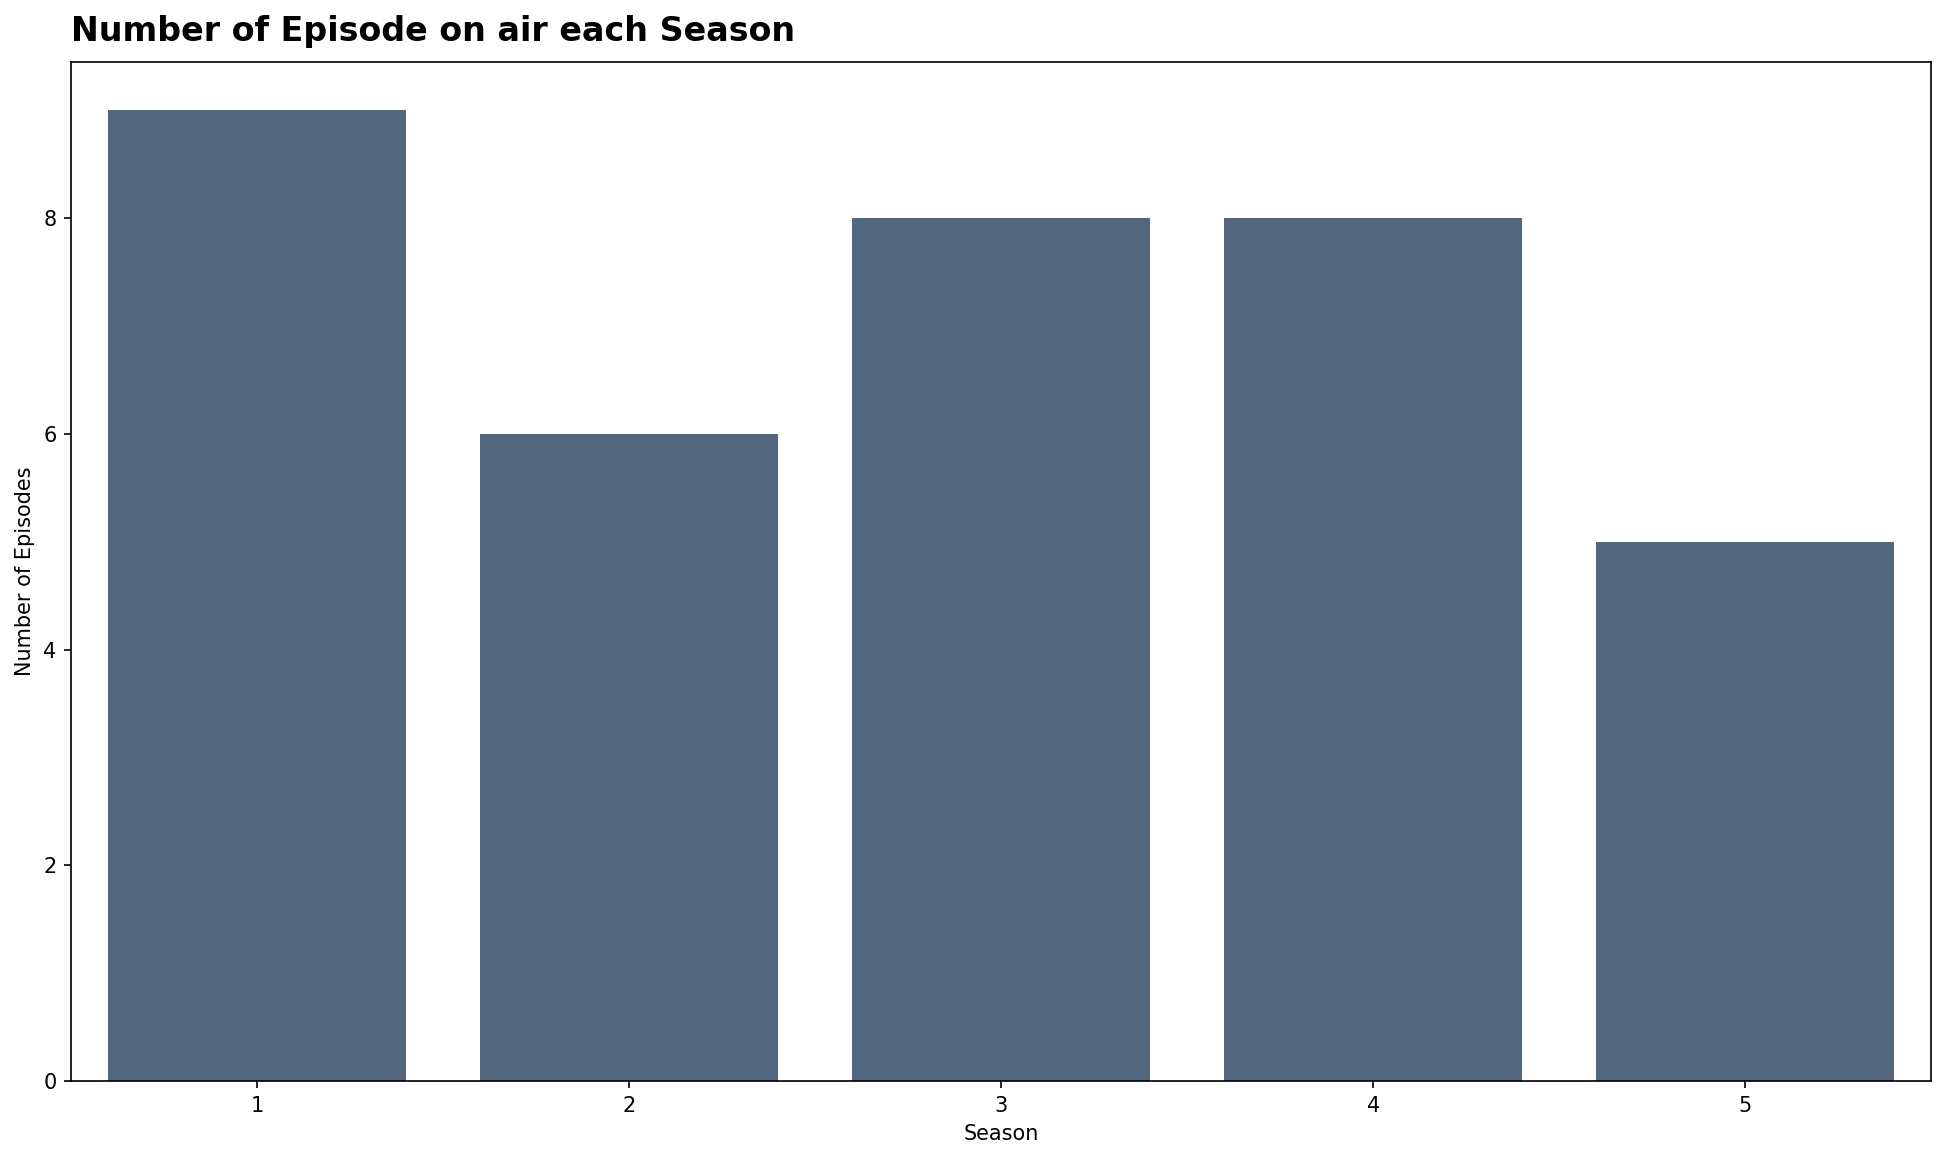

In [52]:
fig = plt.figure(figsize=(16, 9))
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.barplot(x=ep_per_season.index, y='Ep. Count', data=ep_per_season, 
            color=line_color,
            ax=ax)
ax.set_title('Number of Episode on air each Season')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Episodes')

plt.savefig('plots/num_of_ep_each_season.png', bbox_inches='tight')

**Observations:**
- Currently, Season 1 has the most episodes, `9`, and Season 5 with only `5` episode has the least, But at the end of this year, when Season 5 has completely published, it will has the most episodes, `10`.

### 3.2.2 Episode Length Over Time

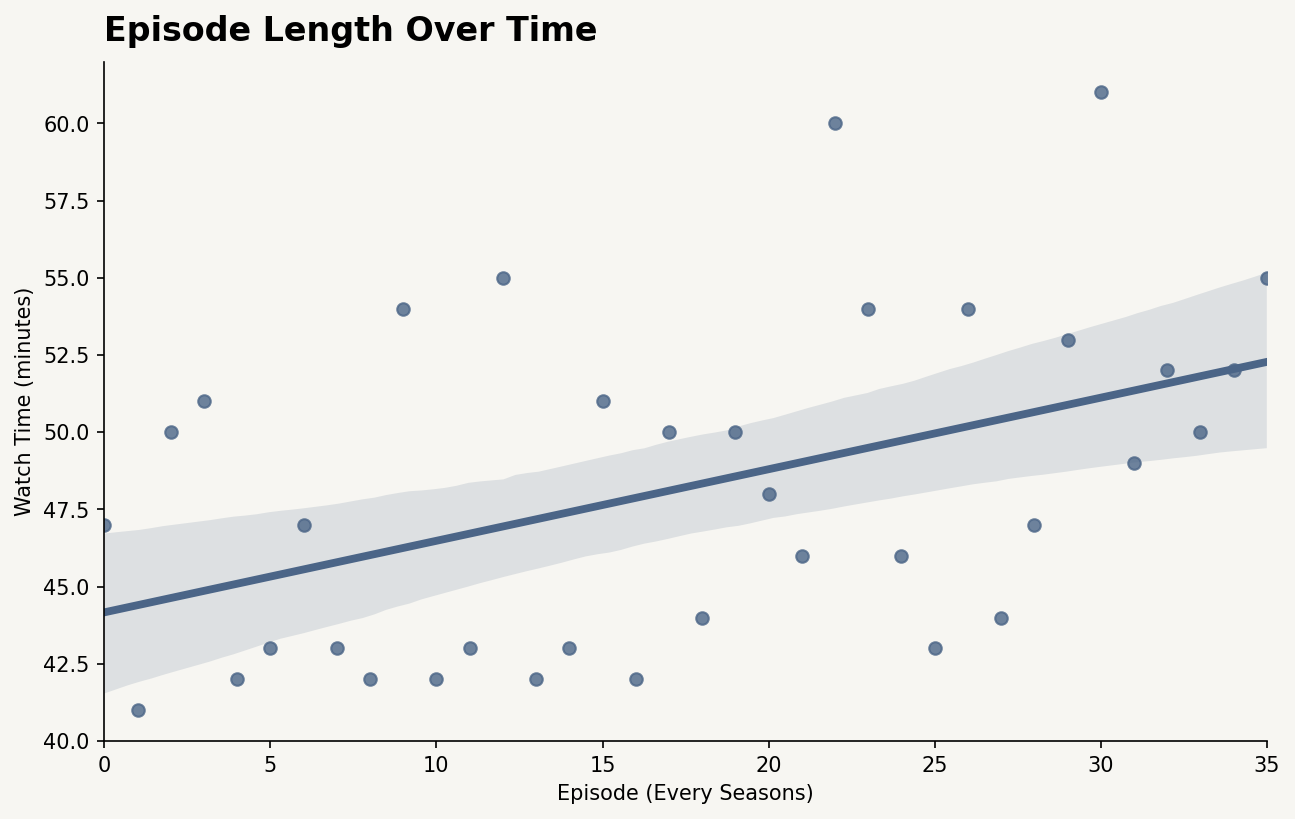

In [49]:
fig = plt.figure(figsize=(10, 6), facecolor=bg_color)
gs = fig.add_gridspec(1, 1)

ax = fig.add_subplot(gs[0, 0], facecolor=bg_color)
ax.spines[['top', 'right']].set_visible(False)

sns.regplot(x=df.index, y=df['Watch Time (minutes)'], color=line_color, )
ax.set_title('Episode Length Over Time')
ax.set_xlabel('Episode (Every Seasons)')

plt.savefig('plots/ep_len_over_time.png', bbox_inches='tight')

**Observations:**
- It has no constant length for each episode, it's oscillate from `40 mins` to `60 mins` per episode.
- The length of each episode is in an slighly increasing trend.

### 3.2.3 IMDB Over Time
<a href=https://colorhunt.co/palette/f0e5cff7f6f2c8c6c64b6587>Color Palette in used</a>

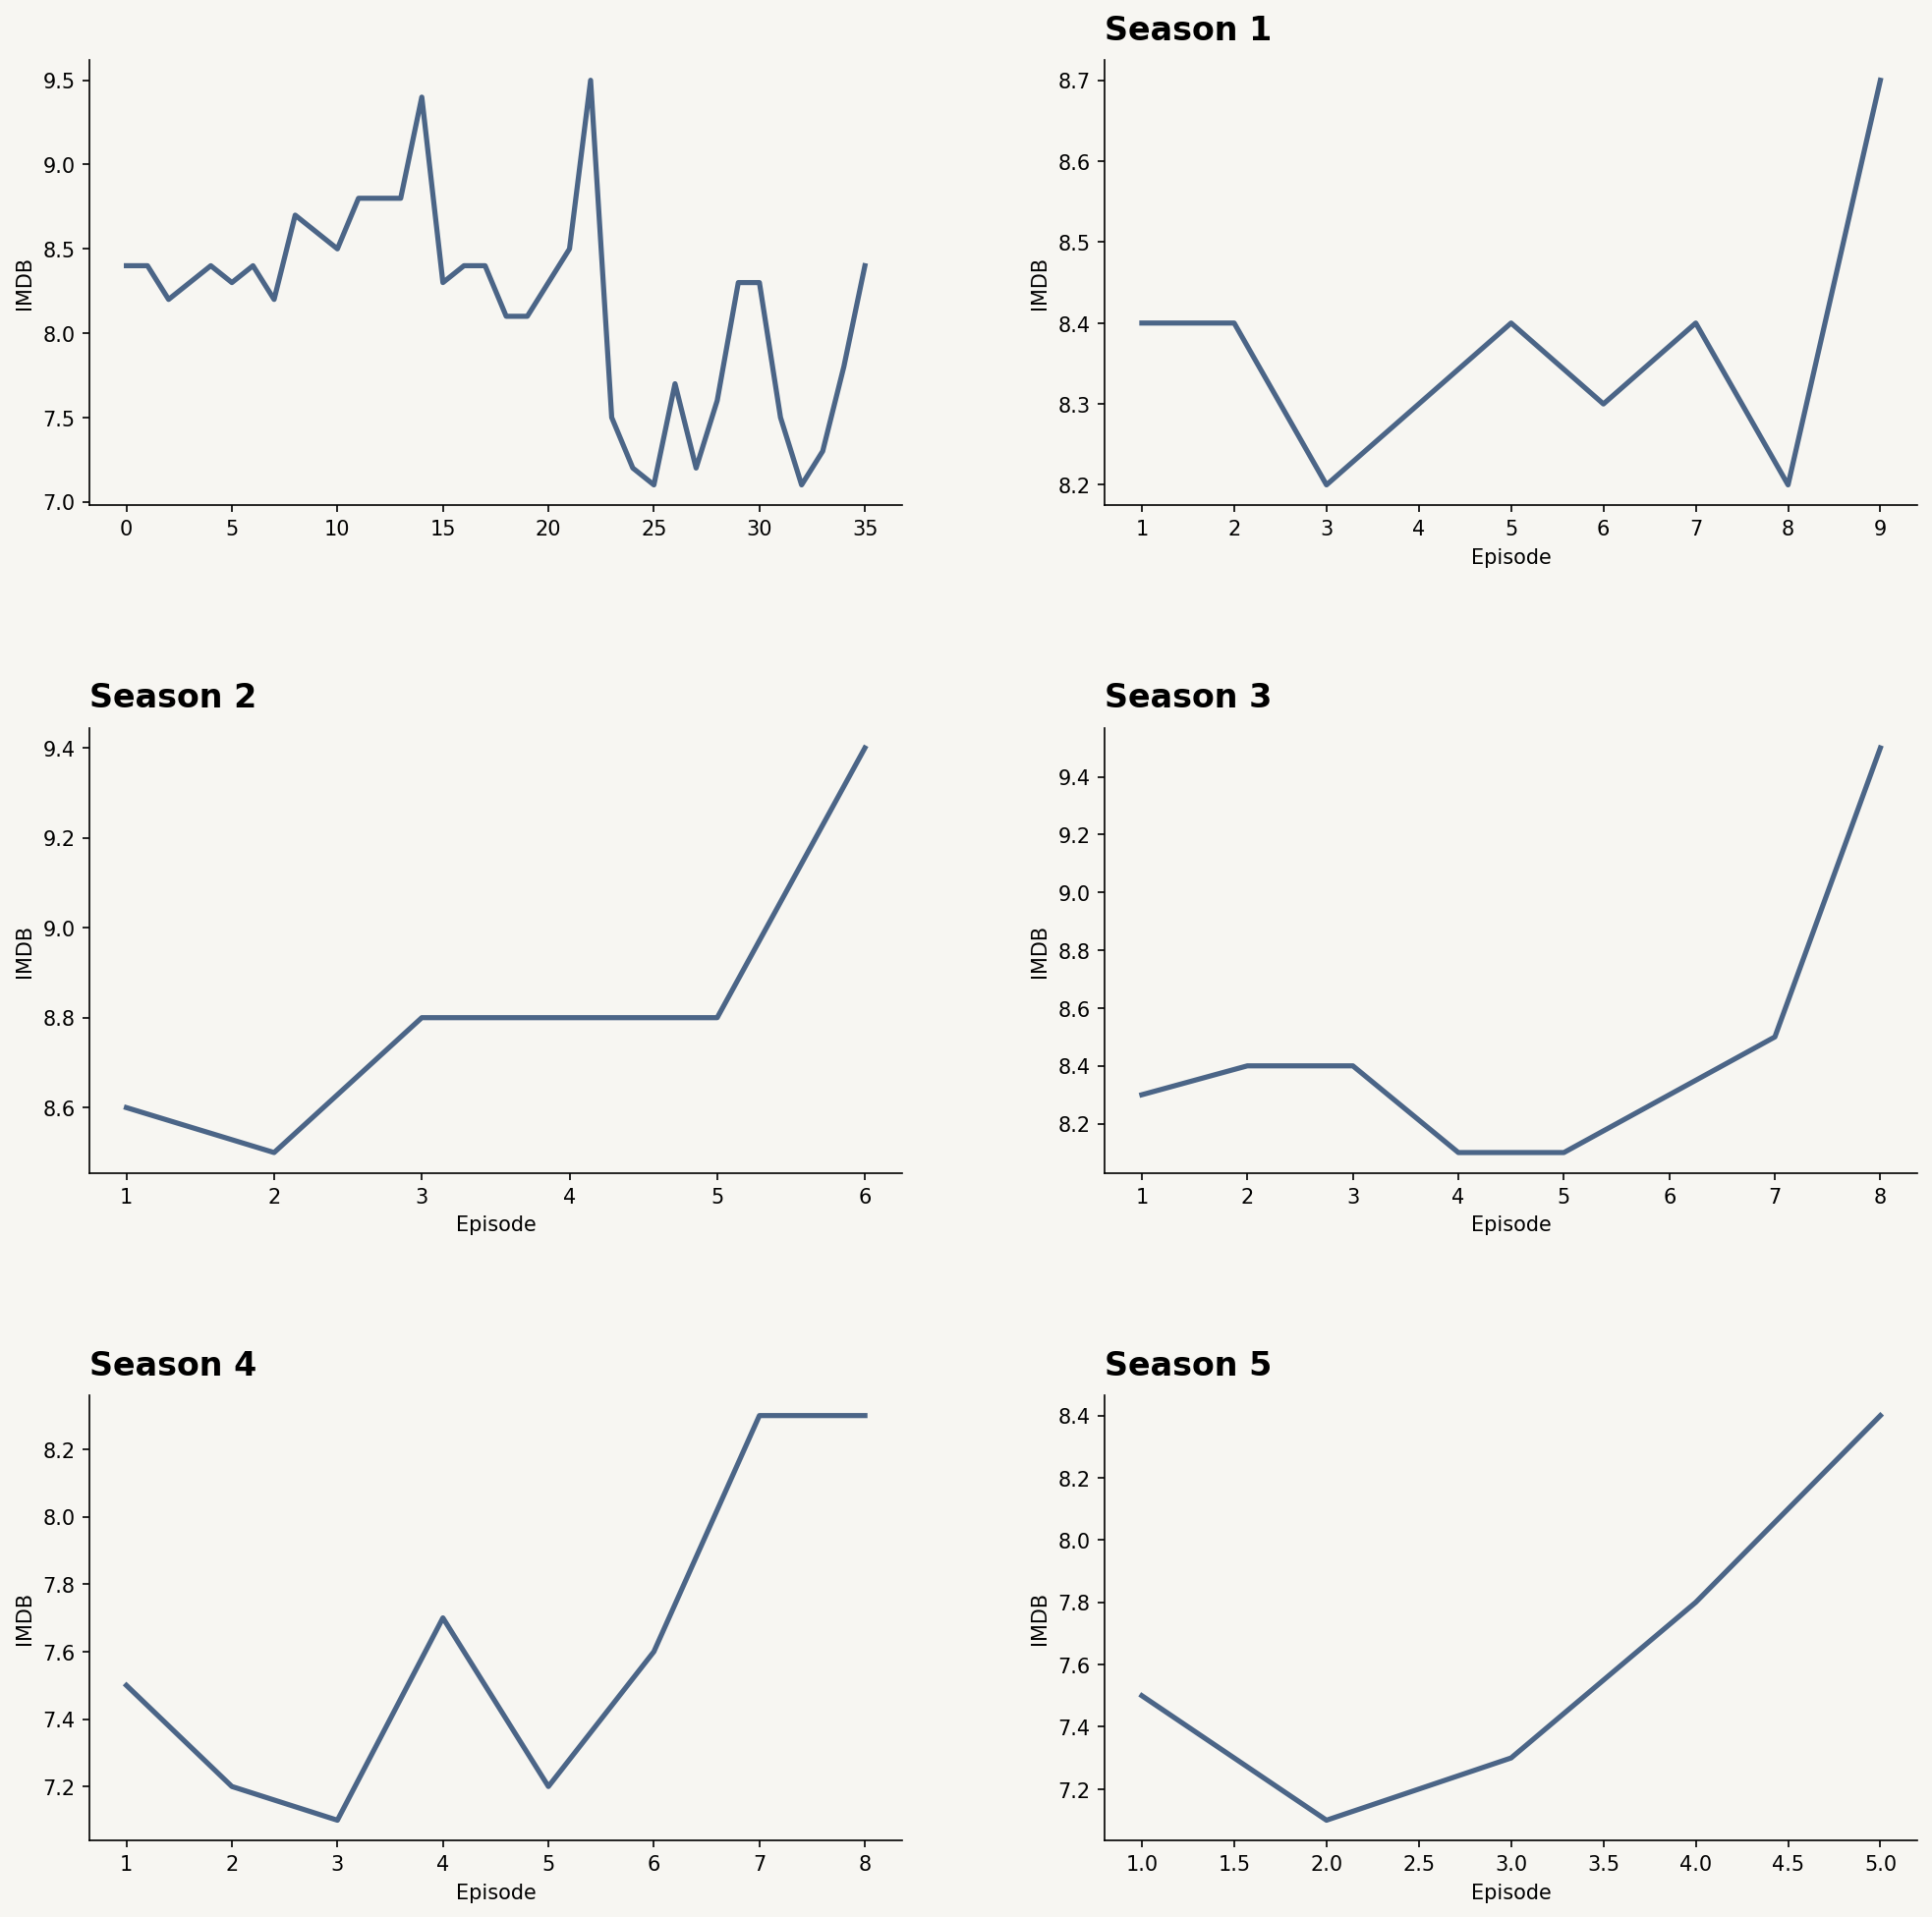

In [53]:
fig = plt.figure(figsize=(16, 16), facecolor=bg_color)
gs = fig.add_gridspec(3, 2)
gs.update(hspace=.5, wspace=.25)

# Plot IMDB Over time in subplot 0
ax0 = fig.add_subplot(gs[0, 0])
ax0.spines[['top', 'right']].set_visible(False)
ax0.set_facecolor(bg_color)
sns.lineplot(x=df.index, y=df['IMDB'], color=line_color, ax=ax0)

# Plot IMDB point of each Season in remain subplots
plot_no = 1
for row in range(3):
    for col in range(2):
        if (row, col) == (0, 0):
            pass # Already plot this subplot above, just pas and plot others.
        else:
            # Create Subplot & Initial Setting
            locals()['ax'+str(plot_no)] = fig.add_subplot(gs[row, col])
            locals()['ax'+str(plot_no)].spines[['top', 'right']].set_visible(False)
            locals()['ax'+str(plot_no)].set_facecolor(bg_color)
            locals()['ax'+str(plot_no)].set_title('Season '+str(plot_no))
            # Plotting
            plot_data = df[(df['Season']==plot_no)]
            sns.lineplot(x=plot_data['Episode'], y=plot_data['IMDB'], color=line_color, ax=locals()['ax'+str(plot_no)])
            # Add Text (Label)
            
            
            plot_no += 1
            
plt.savefig('plots/imdb-over-time-6plots.png', bbox_inches='tight')

**Observations:**
- **Money Heist** has the average `IMDB` point of `8.2`.
- Ep.8 Season 3 has the most `IMDB` point, `9.5`. On the opposite extreme, Ep.3 Season 4 with `7.1` `IMDB` point is the worst (It's the worst but not bad... `7.1`, what do you want more?
- After the last ep. (Ep. 8 above) of Season 3 reached the peak point, Season 4 point is... a disappointment with a average `IMDB` point of `7.6` (compares to `8.45` of Season 3).
- **`Insight`**: People Love *Last Episodes*:
    - We barely see this trend in Season 1, but `8.7` for Last Ep compare to average of `8.3` is considerable.
    - In Season 2, the `IMDB` points of the whole season roughly stay the same at `8.8` but the Last Episode reach `9.4`.
    - The same scenario happened with Season 3, `9.5` for the Last Episode and average 8.3 for other Eps.
    - Season 4 point is not good, but everything stay the same: `8.3` point for 2 Last Episodes but only `7.4` on average for others.
    - *Conclusion* with some prediction for Season 5: Like Season 4, Season 5 score some how is... a disappoinment. On average `7.6` point for the first half of the Season is not a good sign, maybe the film's Producer want to make 'a bop' at the end, who knows? But we can (somehow) predict that the Last Episode can reach about `9.0` (atmost, I guess).

In [11]:
# IMDB Average Score for each Season
df_score = round(df.groupby('Season').mean()['IMDB'], 2)
# Number of Episode in each Season
df_ep_num = df.groupby('Season').count()['Episode']
# How long (minutes) each Season is?
df_time = df.groupby('Season').sum()['Watch Time (minutes)']
# Join them 
df_season = pd.DataFrame({'Number of Episode': df_ep_num, 'Length': df_time, 'Avg IMDB': df_score})
# Take the Corr Point
print('Correlation Point between Number of Ep. and Avg IMDB Score:', round(df_season.corr().loc['Number of Episode', 'Avg IMDB'], 2))

Correlation Point between Number of Ep. and Avg IMDB Score: 0.16


<AxesSubplot:>

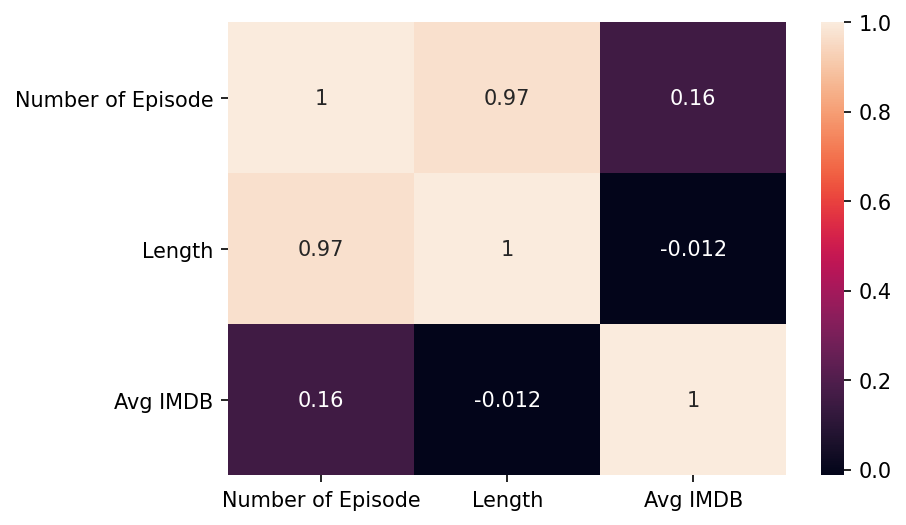

In [12]:
# Correlation Score
sns.heatmap(df_season.corr(), annot=True)

**Observations:**
- The Correlation between each is not great enough to be considered (`0.97` score between `length` and `#Episodes` is normal, isn't it undoubtable?)